# Implementing Linear Regression in Python

## Simple Linear Regression with scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([5, 20, 14, 32, 22, 38])

In [4]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression()

In [10]:
r_sq = model.score(x, y)
print('Coefficient of determination :',r_sq)

Coefficient of determination : 0.7158756137479542


In [11]:
print('intercept :', model.intercept_)
print('slope :', model.coef_)

intercept : 5.633333333333329
slope : [0.54]


In [13]:
y_pred = model.predict(x)
print('predicted response :', y_pred, sep='\n')

predicted response :
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


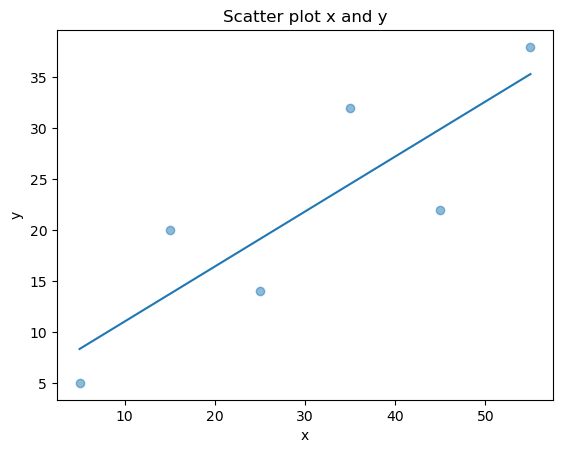

In [14]:
plt.scatter(x, y, alpha=.5)
plt.plot(x, y_pred)

plt.title("Scatter plot x and y")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
x_new = np.arange(5).reshape((-1,1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


## Multiple Linear Regression with Scikit-Learn

In [2]:
x = [[0,1], 
     [5,1], 
     [15,2], 
     [25, 5],
     [35, 11],
     [45, 15],
     [55, 34],
     [60, 35]
    ]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [4]:
model = LinearRegression().fit(x, y)

In [18]:
r_sq = model.score(x, y)

In [19]:
print('Coefficient of determination :',r_sq)
print('intercept :', model.intercept_)
print('slope :', model.coef_)

Coefficient of determination : 0.8615939258756775
intercept : 5.52257927519819
slope : [0.44706965 0.25502548]


In [20]:
y_pred = model.predict(x)
y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [21]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [7]:
x_new = np.arange(10).reshape(-1,2)
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression with Scikit-Learn

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
x = np.array([5,15,25,45,55]).reshape(-1,1)
y = np.array([15, 11, 2, 8, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [45]
 [55]]
[15 11  2  8 32]


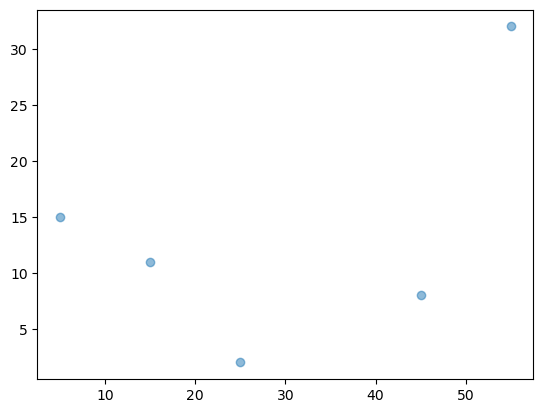

In [10]:
plt.scatter(x, y, alpha=.5)

In [11]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [12]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [13]:
x2 = transformer.transform(x)
x2

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  45., 2025.],
       [  55., 3025.]])

In [14]:
x2_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [15]:
x2_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  45., 2025.],
       [  55., 3025.]])

In [16]:
model = LinearRegression().fit(x2, y)

In [17]:
r_sq = model.score(x2, y)
print('Coefficient of determination :',r_sq)
print('intercept :', model.intercept_)
print('slope :', model.coef_)

Coefficient of determination : 0.8748494296039112
intercept : 26.1875
slope : [-1.83636364  0.03431818]


In [18]:
x2_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
x2_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [28]:
model = LinearRegression(fit_intercept=False).fit(x2_, y)

In [29]:
r_sq = model.score(x2_, y)
print('Coefficient of determination :',r_sq)
print('intercept :', model.intercept_)
print('slope :', model.coef_)

Coefficient of determination : 0.8748494296039112
intercept : 0.0
slope : [26.1875     -1.83636364  0.03431818]


In [26]:
y_pred = model.predict(x2_)
print('predicted response :', y_pred, sep='\n')

predicted response :
[17.86363636  6.36363636  1.72727273 13.04545455 29.        ]


In [27]:
x2_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [30]:
x = [
    [0, 1],
    [5, 1],
    [15, 2],
    [25, 5],
    [35, 11],
    [45, 15],
    [55, 34],
    [60, 35]
]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [31]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [32]:
model = LinearRegression().fit(x_, y)

In [33]:
r_sq = model.score(x_, y)
intercept, coef = model.intercept_, model.coef_

In [34]:
y_pred = model.predict(x_)

In [35]:
print('Coefficient of determination :',r_sq)
print('intercept :', model.intercept_)
print('Coefficients :', model.coef_, sep='\n')
print('Predicted Response :', y_pred, sep='\n')

Coefficient of determination : 0.9453701449127823
intercept : 0.8430556452396729
Coefficients :
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
Predicted Response :
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


## Advanced Linear Regression with Statsmodel

In [36]:
import statsmodels.api as sm

In [37]:
x = [
    [0, 1],
    [5, 1],
    [15, 2],
    [25, 5],
    [35, 11],
    [45, 15],
    [55, 34],
    [60, 35]
]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [38]:
# Menambah Kolom Satu untuk menghitung intercept (b0)
x = sm.add_constant(x)

In [39]:
print(x)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]


In [40]:
model = sm.OLS(y, x)

In [41]:
result = model.fit()

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 26 Sep 2023   Prob (F-statistic):            0.00713
Time:                        09:43:13   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/Users/melawai.it/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [43]:
print("Coefficient of Determination : ", result.rsquared)
print("Adjusted Coefficient of Determination : ", result.rsquared_adj)
print("Regression Coefficient : ", result.params)

Coefficient of Determination :  0.8615939258756776
Adjusted Coefficient of Determination :  0.8062314962259487
Regression Coefficient :  [5.52257928 0.44706965 0.25502548]


In [44]:
print("Predicted Response :", result.fittedvalues, sep='\n')
print("Predicted Response :", result.predict(x), sep='\n')

Predicted Response :
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
Predicted Response :
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [45]:
x_new = sm.add_constant(np.arange(10).reshape((-1,2)))
print(x_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


In [46]:
y_new = result.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# Implementing Linear Regression on Real Dataset

## Using Statmodels

In [59]:
from sklearn import datasets
import pandas as pd

path = "/Users/melawai.it/Documents/Work/Hacktiv8/PYTN-KS17/Sesi 11/Boston.csv"
raw_df = pd.read_csv(path, index_col=0)
raw_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [61]:
df = raw_df.iloc[:, :-1]
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [63]:
target = raw_df.iloc[:, -1]
target

1      24.0
2      21.6
3      34.7
4      33.4
5      36.2
       ... 
502    22.4
503    20.6
504    23.9
505    22.0
506    11.9
Name: medv, Length: 506, dtype: float64

In [65]:
X = df['rm']
y = target.values

model = sm.OLS(y, X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                   3.74e-256
Time:                        10:18:50   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

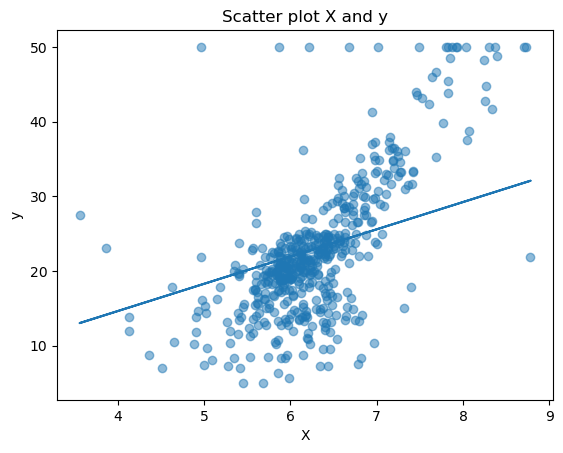

In [66]:
plt.scatter(X, y, alpha=.5)
plt.plot(X, prediction)
plt.title('Scatter plot X and y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Using SKLearn

In [67]:
from sklearn import linear_model

In [68]:
df = pd.read_csv(path, index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [69]:
X = df.iloc[:, :-1]
y = df['medv']

In [70]:
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

In [71]:
predictions = lm.predict(X)
print(predictions)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [73]:
lm.score(X,y)

0.7406426641094094

## Using SKLearn 2

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
path = '/Users/melawai.it/Documents/Work/Hacktiv8/PYTN-KS17/Sesi 11/CarPrice_Assignment.csv'

In [76]:
df = pd.read_csv(path, usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [77]:
df.shape

(205, 2)

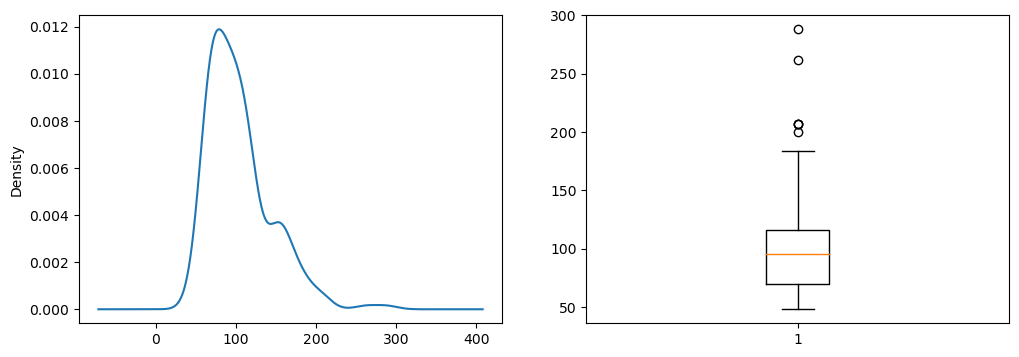

In [79]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])

plt.show()

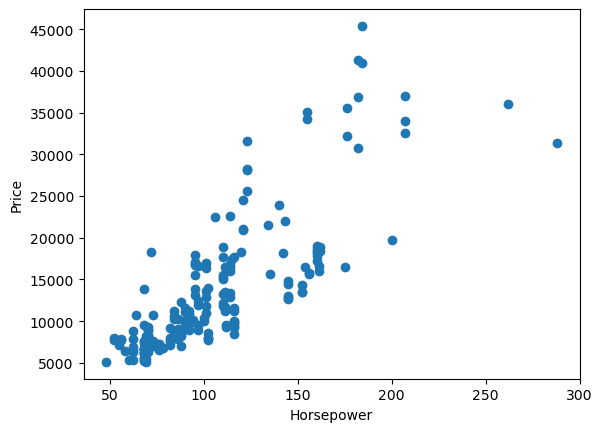

In [82]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

In [81]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [83]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state=42)

In [90]:
x_train.shape

(164, 1)

In [91]:
x_test.shape

(41, 1)

In [92]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [93]:
print(linreg.coef_)
print(linreg.intercept_)

[[156.16135725]]
[-3126.86991019]


In [95]:
linreg.score(x_test, y_test)

0.6326129716904236

In [96]:
y_pred = linreg.predict(x_test)

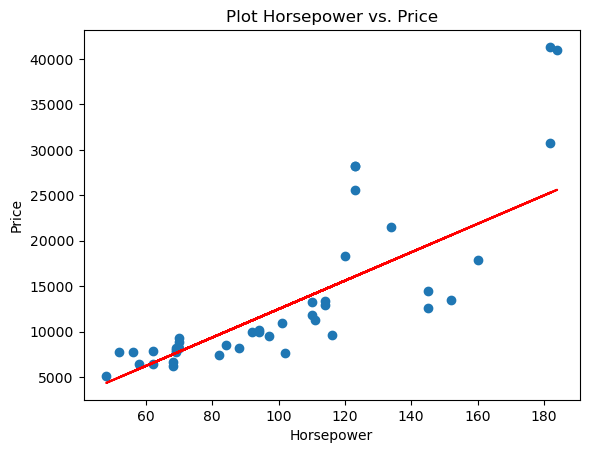

In [99]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs. Price')
plt.show()

In [100]:
linreg.predict([[100]])

array([[12489.26581441]])

In [101]:
linreg.predict([[150]])

array([[20297.33367671]])

In [102]:
linreg.predict([[200]])

array([[28105.40153901]])